# Workforce flow. EDA. Part 2.

| Feature                     | Decision | Reason |
|-----------------------------|---------------------------|--------|
| search_term                 | ❌ Exclude                   | Not relevant for career transitions. |
| id                          | ✅ Include                   | Unique identifier for individuals. |
| urn                         | ❌ Exclude                     | Internal LinkedIn identifier, not useful for analysis. |
| profile_link                | ❌ Exclude                     | Used for accessing profiles, not needed for visualization. |
| profile_id                  | ❌ Exclude                   | Redundant if `id` is included. |
| name                        | ✅ Include                   | Useful for labeling nodes. |
| first_name                  | ❌ Exclude                     | Redundant since `name` includes it. |
| last_name                   | ❌ Exclude                     | Redundant since `name` includes it. |
| location                    | ✅ Include                   | Can be used for geographic career trend analysis. |
| headline                    | ❌ Exclude                     | Mostly personal branding, not structured enough for transitions. |
| estimated_age               | ✅ Include                   | Helps analyze career trends by age group. |
| followers                   | ❌ Exclude                     | Not relevant for career transitions. |
| connections                 | ❌ Exclude                     | Not directly related to career movement. |
| mutuals                     | ❌ Exclude                     | More relevant for networking analysis than career transitions. |
| is_connection               | ❌ Exclude                     | Not relevant for the project's focus. |
| premium                     | ❌ Exclude                     | Subscription status does not impact career transitions. |
| creator                     | ❌ Exclude                     | Not relevant to job transitions. |
| influencer                  | ❌ Exclude                     | Not directly related to career shifts. |
| open_to_work                | ❌ Exclude                     | Represents intent rather than actual transitions. |
| is_hiring                   | ❌ Exclude                     | Not useful for visualizing career paths. |
| current_position            | ❌ Exclude                     | Key information for career transitions, but presents in `experience`. |
| current_company             | ❌ Exclude                     | Essential for visualizing company-based career shifts, but presents in `experience`. |
| past_company_1              | ❌ Exclude                     | Helps track career transitions, but presents in `experience`. |
| past_company_2              | ❌ Exclude                     | Useful for analyzing multiple career moves, but presents in `experience`. |
| school_1                    | ❌ Exclude                     | Important for educational background insights, but presents in `schools`. |
| school_2                    | ❌ Exclude                     | Less relevant than primary school/university, and presents in `schools`. |
| top_skill_1                 | ❌ Exclude                     | Presents in `skills`. |
| top_skill_2                 | ❌ Exclude                     | Presents in `skills`. |
| top_skill_3                 | ❌ Exclude                     | Presents in `skills`. |
| bio                         | ❌ Exclude                     | Unstructured text, not useful for transitions. |
| experiences                 | ✅ Include                   | Key to tracking career progression. |
| schools                     | ✅ Include                   | Helps in educational background analysis. |
| skills                      | ✅ Include                   | Valuable for skill-based career trends. |
| certifications              | ✅ Include                   | Adds information about professional development. |
| languages                   | ❌ Exclude                     | Not directly related to career transitions. |
| emails_in_bio               | ❌ Exclude                     | Not relevant and contains privacy concerns. |
| potential_emails            | ❌ Exclude                     | No data available and privacy-sensitive. |
| profile_photo               | ❌ Exclude                     | Not necessary for visualizing transitions. |
| banner_photo                | ❌ Exclude                     | Not useful for analysis. |
| connection_created_at       | ❌ Exclude                     | Irrelevant for career transitions. |
| connection_email            | ❌ Exclude                     | Privacy-sensitive and unnecessary. |
| connection_phone_numbers    | ❌ Exclude                     | Privacy-sensitive, not useful. |
| connection_websites         | ❌ Exclude                     | Not relevant for career transitions. |
| connection_street_address   | ❌ Exclude                     | No data available, not relevant. |
| connection_birthday         | ❌ Exclude                     | Not necessary for career transitions. |

## Loading data

In [1]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=e27583b113885caf805234347940bf5d2a0bc926bab3ec2fd5c6132ca22b972d
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [24]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from googletrans import Translator
import re
import requests
from tqdm import tqdm

In [3]:
# Read dataset with 100 collected users for each file
root = 'users/'
users_0_100 = pd.read_csv(f'{root}users_0_100.csv')
users_100_200 = pd.read_csv(f'{root}users_100_200.csv')
users_200_300 = pd.read_csv(f'{root}users_200_300.csv')
users_300_400 = pd.read_csv(f'{root}users_300_400.csv')
users_400_500 = pd.read_csv(f'{root}users_400_500.csv')
users_500_550 = pd.read_csv(f'{root}users_500_550.csv')
users_550_552 = pd.read_csv(f'{root}users_550_552.csv')
users_552_600 = pd.read_csv(f'{root}users_552_600.csv')
users_600_700 = pd.read_csv(f'{root}users_600_700.csv')
users_700_745 = pd.read_csv(f'{root}users_700_745.csv')
users_745_843 = pd.read_csv(f'{root}users_745_843.csv')

In [4]:
# Concatenate all dataframes into one common users dataframe
users = pd.concat([users_0_100,
                   users_100_200,
                   users_200_300,
                   users_300_400,
                   users_400_500,
                   users_500_550,
                   users_550_552,
                   users_552_600,
                   users_600_700,
                   users_700_745,
                   users_745_843], ignore_index=True)
users.head()

,search_term,id,urn,profile_link,profile_id,name,first_name,last_name,location,headline,...,emails_in_bio,potential_emails,profile_photo,banner_photo,connection_created_at,connection_email,connection_phone_numbers,connection_websites,connection_street_address,connection_birthday
0,manual,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,266161080,https://www.linkedin.com/in/ACoAAA_dS7gB-ucqa7...,roberto-enrique-chavez-rodriguez-4a017875,Roberto Enrique Chavez Rodriguez,Roberto Enrique,Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",Software Engineer at the Center of Oil and Gas...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQFZ...,https://media.licdn.com/dms/image/v2/C4E16AQF5...,NaN,NaN,[],[],NaN,May 29
1,manual,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,265756375,https://www.linkedin.com/in/ACoAAA_XHtcBA0rpWC...,maxim-shalavin,Maxim Shalavin,Maxim,Shalavin,"Tbilisi, Georgia",Team Lead | Senior Golang Developer | Blockcha...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQEQ...,https://media.licdn.com/dms/image/v2/D4D16AQEq...,NaN,NaN,[],['https://github.com/sansaian'],NaN,NaN
2,manual,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,260311431,https://www.linkedin.com/in/ACoAAA-ECYcB5_w3-S...,zaplatinaolga,Olga Z.,Olga,Z.,"Kazan, Tatarstan, Russia",Project management | internal communications |...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQHl...,https://media.licdn.com/dms/image/v2/C4E16AQHR...,NaN,NaN,[],[],NaN,August 30
3,manual,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,221535739,https://www.linkedin.com/in/ACoAAA00XfsBNdzmLH...,fazullin,Timur Fazullin,Timur,Fazullin,"Innopolis, Tatarstan, Russia",Head of Communications and Branding,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4D03AQFF...,NaN,NaN,NaN,[],['https://fazullin.site/'],NaN,NaN
4,manual,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,218667241,https://www.linkedin.com/in/ACoAAA0ImOkB2Ninxe...,vasiliizorin,Vasilii Zorin,Vasilii,Zorin,"Toronto, Ontario, Canada",Lead Product Manager at Acronis,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQHz...,NaN,NaN,NaN,[],[],NaN,May 12


In [5]:
users = users[['id', 'name', 'location', 'estimated_age',
               'experiences', 'schools', 'skills', 'certifications']].copy()

In [6]:
# Check duplicated profile_id in dataset
users.duplicated(subset='id').sum()

np.int64(0)

In [7]:
# Check duplicated profile_id in dataset
users.duplicated().sum()

np.int64(0)

In [8]:
users.head()

,id,name,location,estimated_age,experiences,schools,skills,certifications
0,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,Roberto Enrique Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",35.0,"[{'start_date': '2022-01-14', 'end_date': '202...","[{'start_date': '2021-08-14', 'end_date': '202...","[{'name': 'JavaScript', 'endorsements': 0, 'pa...",[{'title': 'Duolingo German Fluency: Elementar...
1,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,Maxim Shalavin,"Tbilisi, Georgia",34.0,"[{'start_date': '2023-04-14', 'end_date': None...","[{'start_date': '2015-03-14', 'end_date': '201...","[{'name': 'Java', 'endorsements': 0, 'passed_a...",[{'title': 'Apache Kafka Essential Training: G...
2,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,Olga Z.,"Kazan, Tatarstan, Russia",37.0,"[{'start_date': '2023-05-14', 'end_date': None...","[{'start_date': '2011-03-14', 'end_date': '201...","[{'name': 'English', 'endorsements': 16, 'pass...","[{'title': 'ESL: Improving Oral Skills (18)', ..."
3,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,Timur Fazullin,"Innopolis, Tatarstan, Russia",40.0,"[{'start_date': '2024-10-14', 'end_date': None...","[{'start_date': '2003-03-14', 'end_date': '200...","[{'name': 'Контент-маркетинг', 'endorsements':...",NaN
4,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,Vasilii Zorin,"Toronto, Ontario, Canada",31.0,"[{'start_date': '2023-11-14', 'end_date': None...","[{'start_date': '2019-03-14', 'end_date': '202...","[{'name': 'Scrum', 'endorsements': 14, 'passed...","[{'title': 'Certified SAFe 4 Agilist', 'issuer..."


In [9]:
users.shape

(840, 8)

In [10]:
# Calculate percentage of missing values in all columns
for column in users.columns:
    missing_percentage = (users[column].isnull().sum() / users.shape[0]) * 100
    print(f'Percentage of missing values in \'{column}\' column: {round(missing_percentage, 3)}%')

Percentage of missing values in 'id' column: 0.0%
Percentage of missing values in 'name' column: 0.0%
Percentage of missing values in 'location' column: 0.238%
Percentage of missing values in 'estimated_age' column: 3.81%
Percentage of missing values in 'experiences' column: 2.381%
Percentage of missing values in 'schools' column: 1.071%
Percentage of missing values in 'skills' column: 7.976%
Percentage of missing values in 'certifications' column: 61.667%


In [11]:
# Fill missing values in location
users.fillna({'location': 'no location'}, inplace=True)

In [12]:
# Fill missing list values separately
for col in ['experiences', 'schools', 'skills', 'certifications']:
    users[col] = users[col].apply(lambda x: [] if pd.isna(x) else x)

## Language Standardization

In [13]:
# Initialize the translator
translator = Translator()

# Apply progress bar to dataframe
tqdm.pandas()

# Function to translate text to English
def translate_to_english(text):

    # Detect non-English characters
    if text and not text.isascii():
        try:
            return translator.translate(text, dest='en').text
        except:
            return text
    return text

## "Experiences" column

### Extracting needed information

In [14]:
import ast

# Create list for users experiences
users_experiences = []

# Go through users['experiences'] to convert it in proper format
for experiences in users['experiences']:
    # If experience is empty, then skip it
    if len(experiences) == 0:
        users_experiences.append([])
        continue

    # Convert the string to a list
    data_list = ast.literal_eval(experiences)
    user_experiences = []

    # Store only dates, position, company name, and work type (full time, part time, and etc.)
    for experience in data_list:
        user_experience = {'start_date': experience['start_date'],
                            'end_date': experience['end_date'],
                            'title': experience['title'],
                            'company': experience['company'],
                            'emp_type': experience['emp_type']
                            }

        user_experiences.append(user_experience)
    users_experiences.append(user_experiences)

In [15]:
# Extract only unique positions for language standartization
titles = set()
for experiences in users_experiences:
    for experience in experiences:
        titles.add(experience['title'])

In [16]:
len(titles)

2283

In [17]:
titles_list = list(titles)

In [18]:
# Translate to English all positions and store its translation
translated_titles = {}
for title in tqdm(titles_list):
    translated_titles[title] = translate_to_english(title)

100%|██████████| 2283/2283 [02:31<00:00, 15.07it/s]


In [19]:
# Convert positions in dataframe to English version
for experiences in users_experiences:
    for experience in experiences:
        experience['title'] = translated_titles[experience['title']]

In [20]:
# Assign new experiences column
users['experiences'] = users_experiences

In [29]:
users['experiences'][0]

[{'start_date': '2022-01-14',
  'end_date': '2023-07-14',
  'title': 'Java Software Developer',
  'company': 'Innopolis University',
  'emp_type': 'full-time'},
 {'start_date': '2016-06-14',
  'end_date': '2016-10-14',
  'title': 'Energy Engineer',
  'company': 'Tech Mahindra',
  'emp_type': None},
 {'start_date': '2015-05-14',
  'end_date': '2016-05-14',
  'title': 'Mechanical Engineer',
  'company': 'FINILAGER S.A.',
  'emp_type': None},
 {'start_date': '2012-02-14',
  'end_date': '2014-12-14',
  'title': 'Graduate Teaching Assistant',
  'company': 'Universidad Mayor de San Andres',
  'emp_type': None},
 {'start_date': '2013-08-14',
  'end_date': '2013-12-14',
  'title': 'Mechanical Engineer',
  'company': 'FCM Bolivia',
  'emp_type': None},
 {'start_date': '2013-08-14',
  'end_date': '2013-09-14',
  'title': 'Translator and Logistics coordinator',
  'company': 'Suma Huasij – NGO to help Communities',
  'emp_type': None},
 {'start_date': '2013-01-14',
  'end_date': '2013-07-14',
  't

In [30]:
users.head()

,id,name,location,estimated_age,experiences,schools,skills,certifications
0,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,Roberto Enrique Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",35.0,"[{'start_date': '2022-01-14', 'end_date': '202...","[{'start_date': '2021-08-14', 'end_date': '202...","[{'name': 'JavaScript', 'endorsements': 0, 'pa...",[{'title': 'Duolingo German Fluency: Elementar...
1,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,Maxim Shalavin,"Tbilisi, Georgia",34.0,"[{'start_date': '2023-04-14', 'end_date': None...","[{'start_date': '2015-03-14', 'end_date': '201...","[{'name': 'Java', 'endorsements': 0, 'passed_a...",[{'title': 'Apache Kafka Essential Training: G...
2,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,Olga Z.,"Kazan, Tatarstan, Russia",37.0,"[{'start_date': '2023-05-14', 'end_date': None...","[{'start_date': '2011-03-14', 'end_date': '201...","[{'name': 'English', 'endorsements': 16, 'pass...","[{'title': 'ESL: Improving Oral Skills (18)', ..."
3,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,Timur Fazullin,"Innopolis, Tatarstan, Russia",40.0,"[{'start_date': '2024-10-14', 'end_date': None...","[{'start_date': '2003-03-14', 'end_date': '200...","[{'name': 'Контент-маркетинг', 'endorsements':...",[]
4,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,Vasilii Zorin,"Toronto, Ontario, Canada",31.0,"[{'start_date': '2023-11-14', 'end_date': None...","[{'start_date': '2019-03-14', 'end_date': '202...","[{'name': 'Scrum', 'endorsements': 14, 'passed...","[{'title': 'Certified SAFe 4 Agilist', 'issuer..."


In [31]:
# Convert to JSON and save
users.to_json("users.json", orient="records", indent=4)

### Position clusterization

In [25]:
!pip install umap-learn

In [26]:
import umap.umap_ as umap
import torch
from sentence_transformers import SentenceTransformer
from matplotlib.lines import Line2D

In [23]:
positions = list(translated_titles.values())

#### Work with word embeddings

In [28]:
# Check if CUDA is available and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load a pre-trained SentenceTransformer model on CUDA
model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Convert abstracts to embeddings
embeddings = model.encode(positions, convert_to_tensor=True, device=device)
embeddings = embeddings.cpu().numpy()  # Move back to CPU for UMAP
print("embeddings are ready!")

Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

embeddings are ready!


In [29]:
# Reduce dimensionality using UMAP
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)
print("Reducing dimensionality is complete!")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Reducing dimensionality is complete!


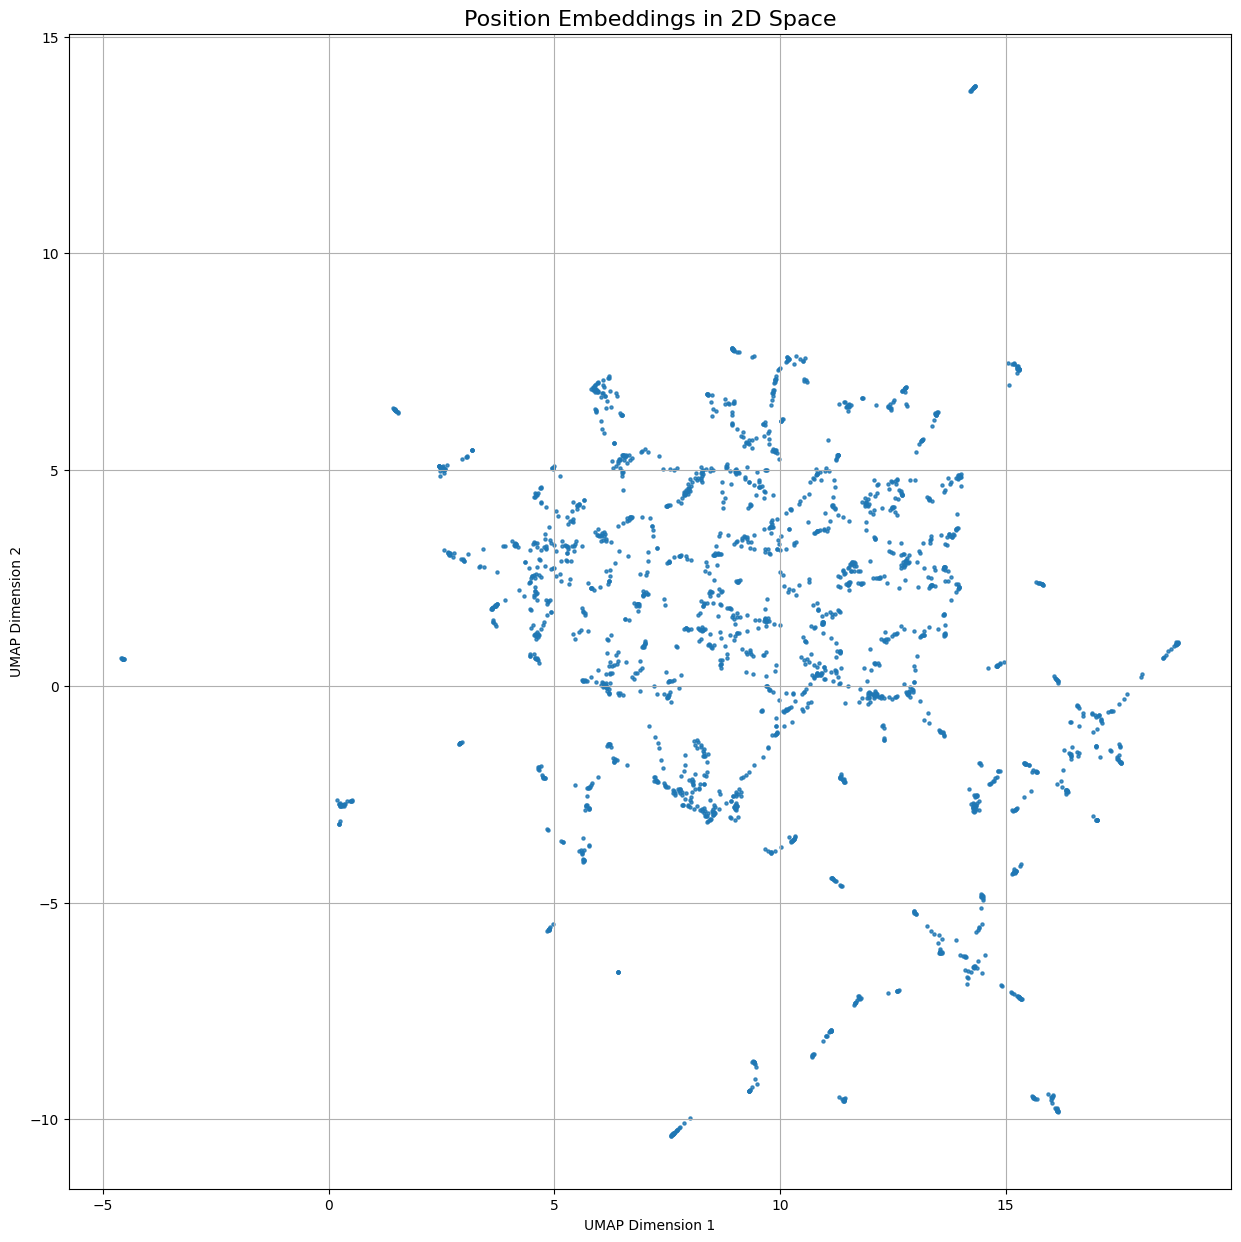

In [31]:
# Plot the embeddings
plt.figure(figsize=(15, 15))

# Use a colormap that supports many categories (e.g., 'tab20', 'gist_ncar')
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

#### KMean

In [43]:
# Apply clustering (choose an appropriate number of clusters)
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

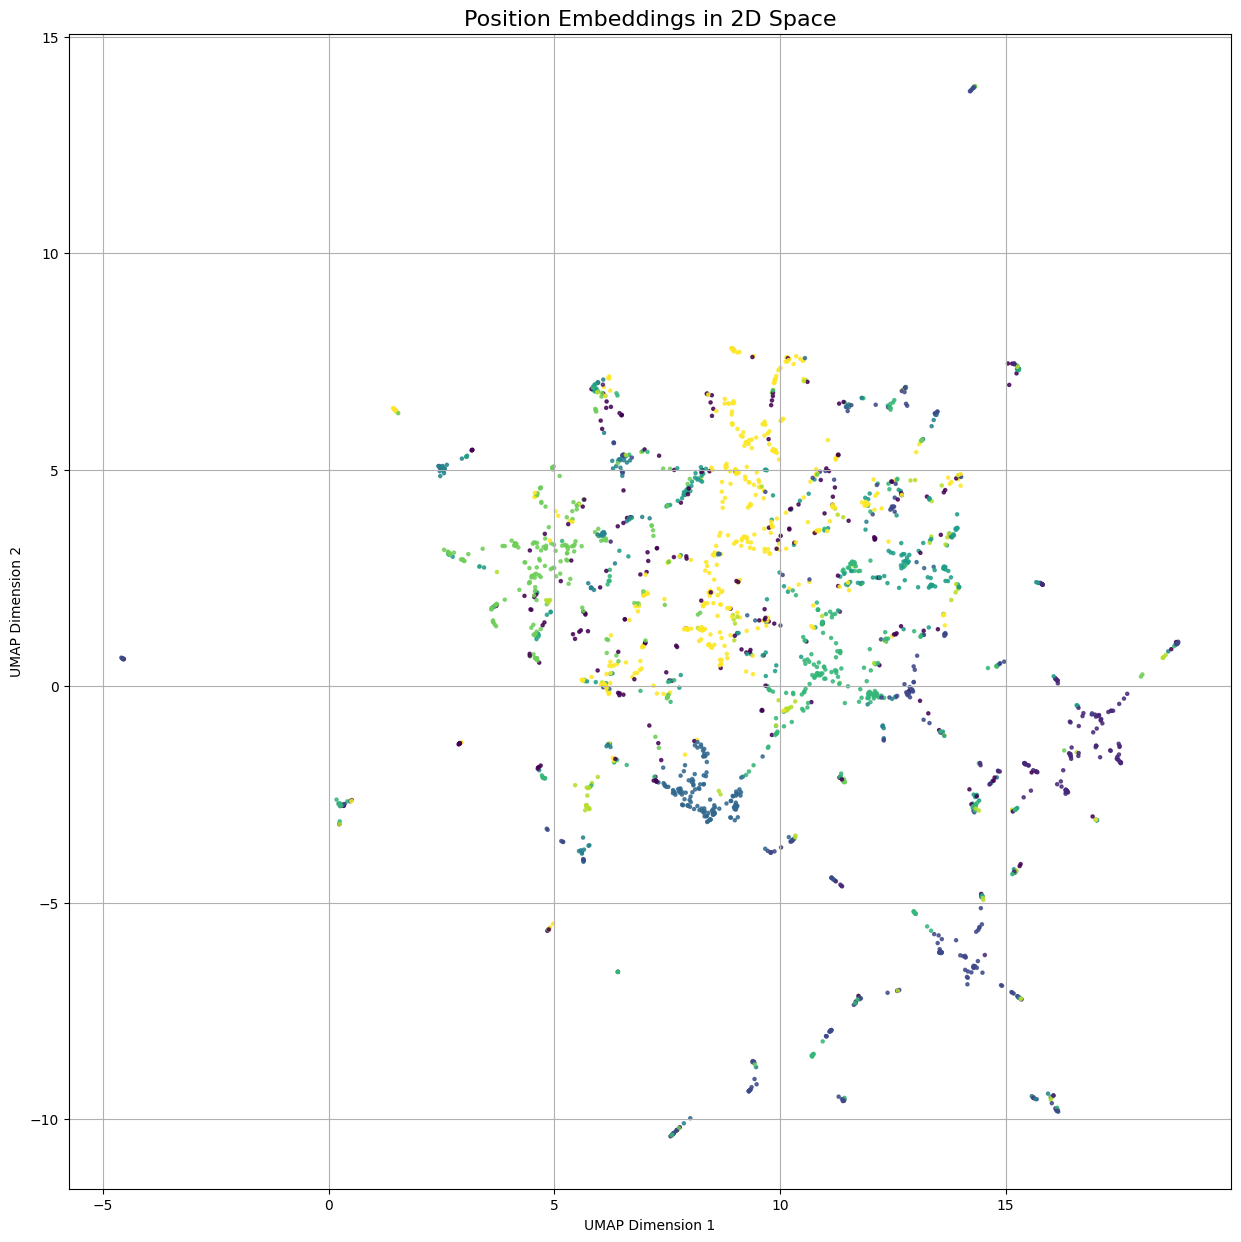

In [44]:
plt.figure(figsize=(15, 15))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, c=labels, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

#### Fuzzy matching

In [50]:
!pip install fuzzywuzzy

In [57]:
import spacy
from fuzzywuzzy import process

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Define standard job title
STANDARD_JOB_TITLES = {"Software Development":0,
                       "Data Science & AI":1,
                       "Cybersecurity":2,
                       "Research & Academia":3,
                       "Operations & Management":4,
                       "Design & UX/UI":5,
                       "Marketing & Sales":6
                       }


def standardize_title(title):
    """Finds the closest match for a job title from the predefined standard titles."""
    match, score = process.extractOne(title, STANDARD_JOB_TITLES.keys())
    return STANDARD_JOB_TITLES[match]


labels = []
# Clusterize job titles
for position in tqdm(positions, total=len(positions)):
    labels.append(standardize_title(position))


100%|██████████| 2283/2283 [00:07<00:00, 318.73it/s]


In [59]:
# Print job titles with assigned clusters
for job, label in zip(positions, labels):
    if label == 1:
        print(f"{job}: Cluster {label}")

Head of Laboratory, Cloud systems and service virtualization: Cluster 1
PhD - Engineering and Applied Science: Cluster 1
Chief Product Officer (Co-Founder): Cluster 1
Big Data Engineer: Cluster 1
Director, Center for autonomous technologies: Cluster 1
Chief robotics scientist: Cluster 1
Co-Founder, Data Scientist: Cluster 1
Senior Student Affairs Specialist: Cluster 1
Data Science Research Intern: Cluster 1
Full Stack Engineer: Cluster 1
Head of Data & Analytics: Cluster 1
Student at MSc in Financial Engineering program (online): Cluster 1
Junior Researcher in Service Science and Engineering Laboratory: Cluster 1
Data analyst: Cluster 1
engineer: Cluster 1
Product Head (B2C Mobile Appendix): Cluster 1
Computer vision and machine learning engineer: Cluster 1
Machine Learning Researcher @ AI Lab: Cluster 1
Navigation Trainee: Cluster 1
Director of Product: Cluster 1
Senior Instructor : Cluster 1
The head of the sector: Cluster 1
Data engineer: Cluster 1
Junior Data Scientist: Cluster 1
D

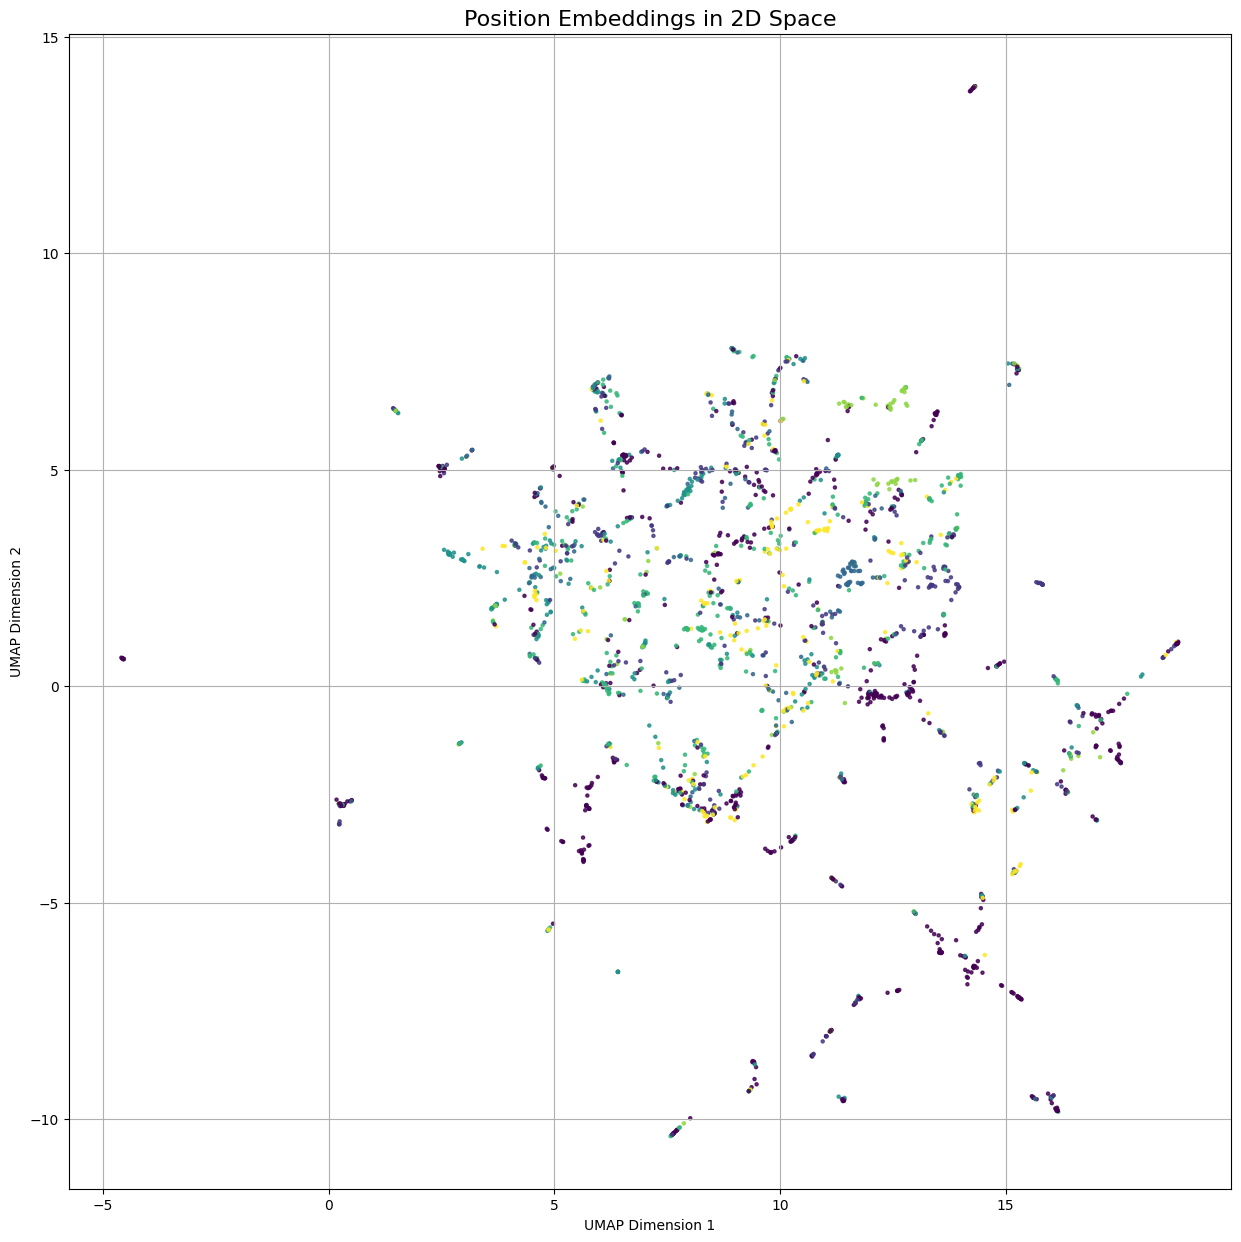

In [60]:
plt.figure(figsize=(15, 15))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, c=labels, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()